In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=2998dabe28e4ce005b6f7657b5c6a841aaca2ce91582b86007560ba1a399bb02
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


I found 1 face(s) in this photograph.
A face is located at pixel location Top: 542, Left: 788, Bottom: 1096, Right: 1342


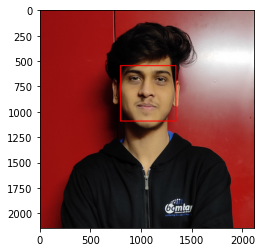

In [2]:
import PIL.Image
import PIL.ImageDraw
import face_recognition


# Load the jpg file into a numpy array
image = face_recognition.load_image_file('/content/drive/My Drive/sarthak.jpg')   #You can use any image instead of 'image.jpeg' which I have used here.

# Find all the faces in the image
face_locations = face_recognition.face_locations(image)

number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="red", width = 10)

# Display the image on screen
import matplotlib.pyplot as plt

plt.imshow(pil_image)
plt.show()

I found 4 face(s) in this photograph.


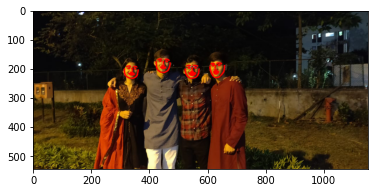

In [3]:
import PIL.Image
import PIL.ImageDraw


# Load the jpg file into a numpy array
image = face_recognition.load_image_file('/content/drive/My Drive/we four.jpg')


# Find all facial features in all the faces in the image
face_landmarks_list  = face_recognition.face_landmarks(image)

number_of_faces = len(face_landmarks_list)
print("I found {} face(s) in this photograph.".format(number_of_faces))

# Load the image into a Python Image Library object so that we can draw on top of it and display it
pil_image = PIL.Image.fromarray(image)

# Create a PIL drawing object to be able to draw lines later
draw = PIL.ImageDraw.Draw(pil_image)

# Loop over each face
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=5)

plt.imshow(pil_image)
plt.show()

A face is located at pixel location Top: 176, Left: 602, Bottom: 228, Right: 654
A face is located at pixel location Top: 182, Left: 314, Bottom: 234, Right: 366
A face is located at pixel location Top: 182, Left: 521, Bottom: 234, Right: 573
A face is located at pixel location Top: 159, Left: 417, Bottom: 211, Right: 469
Found Sarthak in the photo!
Found Jeenu in the photo!
Found Jeenu in the photo!
Found Aryan in the photo!


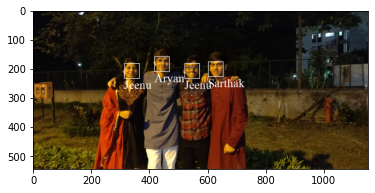

In [12]:
from PIL import ImageFont

# Load the known images
image_of_Aryan = face_recognition.load_image_file("/content/drive/My Drive/aryan.jpg")
image_of_Jeenu = face_recognition.load_image_file("/content/drive/My Drive/jeenu.jpg")
image_of_Kejri = face_recognition.load_image_file("/content/drive/My Drive/Kejri.jpg")
image_of_Shruti = face_recognition.load_image_file("/content/drive/My Drive/shruti.jpg")
image_of_Sarthak = face_recognition.load_image_file("/content/drive/My Drive/sarthak.jpg")
image_of_Kejriwal = face_recognition.load_image_file("/content/drive/My Drive/Kejri 1.jpg")
# Get the face encoding of each person. This can fail if no one is found in the photo.
Aryan_face_encoding = face_recognition.face_encodings(image_of_Aryan)[0]
Jeenu_face_encoding = face_recognition.face_encodings(image_of_Jeenu)[0]
Kejri_face_encoding = face_recognition.face_encodings(image_of_Kejri)[0]
Shruti_face_encoding = face_recognition.face_encodings(image_of_Shruti)[0]
Sarthak_face_encoding = face_recognition.face_encodings(image_of_Sarthak)[0]
Kejriwal_face_encoding = face_recognition.face_encodings(image_of_Kejriwal)[0]
# Create a list of all known face encodings
known_face_encodings = [
    Aryan_face_encoding,
    Jeenu_face_encoding,
    Kejri_face_encoding,
    Shruti_face_encoding,
    Sarthak_face_encoding,
    Kejriwal_face_encoding
]
list_of_names = ["Aryan", "Jeenu", "Kejri", "Shruti", "Sarthak", "Kejriwal"]

# Load the image we want to check
image = face_recognition.load_image_file("/content/drive/My Drive/we four.jpg")

# Get face encodings for any people in the picture
unknown_face_encodings = face_recognition.face_encodings(image)


# Get the face locations of each face
pil_image = PIL.Image.fromarray(image)
face_locations = face_recognition.face_locations(image)
face_landmarks_list  = face_recognition.face_landmarks(image)

for  face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="white", width = 2)

count = 0
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)
    # results output a list with 0 or 1 as output
    name = "Unknown"
    
    # 
    for i in range(len(list_of_names)):
      if results[i]:
        name = list_of_names[i]
        break
    # Get location of each face
    top, right, bottom, left = face_locations[count]
    font = ImageFont.truetype("/content/drive/My Drive/TimeRoman.ttf", 40)
    # draw.text((x, y),"Sample Text",(r,g,b))
    # Label the faces
    draw.text((left, bottom),name,(255,255,255), font = font)
    count = count + 1
    print(f"Found {name} in the photo!")
# Display the output image
plt.imshow(pil_image)
plt.show()
# Save the output image
pil_image.save('output.jpg')
